<a href="https://colab.research.google.com/github/ericlewisX/colorizing_images/blob/main/ColorizingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Cloud Storage 
## Accessing to get images from bucket

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [29]:
# !curl https://sdk.cloud.google.com | bash

In [30]:
# !gcloud init

In [14]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list

In [15]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  76878      0 --:--:-- --:--:-- --:--:-- 76878
OK


In [16]:
!apt -qq update

94 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [17]:
!apt -qq install gcsfuse

The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 94 not upgraded.
Need to get 10.8 MB of archives.
After this operation, 23.1 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.35.1_amd64.deb ...
Unpacking gcsfuse (0.35.1) ...
Setting up gcsfuse (0.35.1) ...


In [18]:
!mkdir imagedataset

mkdir: cannot create directory ‘imagedataset’: File exists


In [19]:
!gcsfuse --implicit-dirs colorizinggalvanize imagedataset/

2021/08/05 14:17:54.104868 Using mount point: /content/imagedataset
2021/08/05 14:17:54.113035 Opening GCS connection...
2021/08/05 14:17:54.653725 Mounting file system "colorizinggalvanize"...
2021/08/05 14:17:54.689821 File system has been successfully mounted.


## Datafolder from Google Cloud Bucket is now mounted. 

### View an image for posterity's sake.

In [21]:
from keras.preprocessing.image import load_img

In [22]:
pwd

'/content'

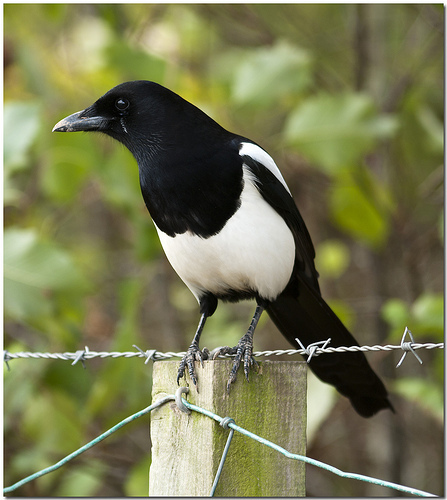

In [23]:
load_img('imagedataset/data/images/test/ILSVRC2012_test_00000002.JPEG')

### This is how many files are in the image test folder. 

In [24]:
import os

files = os.listdir('imagedataset/data/images/test/')
print(len(files))

18447


# Colorizing AutoEncoder

In [27]:
### Imports ###
# Boiler-Plate
import numpy as np
import matplotlib.pyplot as plt
import os
import random

## Image manipulation ##
from PIL import Image as im

from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave, imshow

# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Activation, Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
train_data_generator = ImageDataGenerator(rescale = 1.0/255)

train_set = train_data_generator.flow_from_directory('imagedataset/data/images/test/'', 
                                          target_size=(256, 256), 
                                          batch_size=128, 
                                          class_mode=None)

In [28]:
def imageset_splitter(training_set):
    '''
    This function takes in a training set of RGB images & returns 
    a nested array of images that will be the X and Y matrices based on the LAB colorspace.
    '''
    
    X, Y = [], []
    
    for img in training_set :
        lab = rgb2lab(img)
        
        #Normalize
        X.append(lab[:, :, 0])
        Y.append(lab[:, :, 1:]) # ab channels
        
    X, Y = np.array(X), np.array(Y)
    X = X.reshape(X.shape + (1,)) # Make X & Y dimensions equal
    
    return X , Y



In [ ]:
imageset_splitter(train_set)